In [1]:
import sys

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns
import pandas_profiling

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix


from yellowbrick.classifier import ClassificationReport, ROCAUC


from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn import metrics


plt.style.use('ggplot')
pd.options.display.float_format = '{:,.2f}'.format
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
#df1 = pd.read_csv('bank-additional/bank-additional-full.csv', sep=';')
df2 = pd.read_csv('bank-full.csv')

In [3]:
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df2.shape

(45211, 17)

In [5]:
df2.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [6]:
df2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,"45,211.00",40.94,10.62,18.00,33.00,39.00,48.00,95.00
balance,"45,211.00","1,362.27","3,044.77","-8,019.00",72.00,448.00,"1,428.00","102,127.00"
day,"45,211.00",15.81,8.32,1.00,8.00,16.00,21.00,31.00
duration,"45,211.00",258.16,257.53,0.00,103.00,180.00,319.00,"4,918.00"
campaign,"45,211.00",2.76,3.10,1.00,1.00,2.00,3.00,63.00
pdays,"45,211.00",40.20,100.13,-1.00,-1.00,-1.00,-1.00,871.00
previous,"45,211.00",0.58,2.30,0.00,0.00,0.00,0.00,275.00


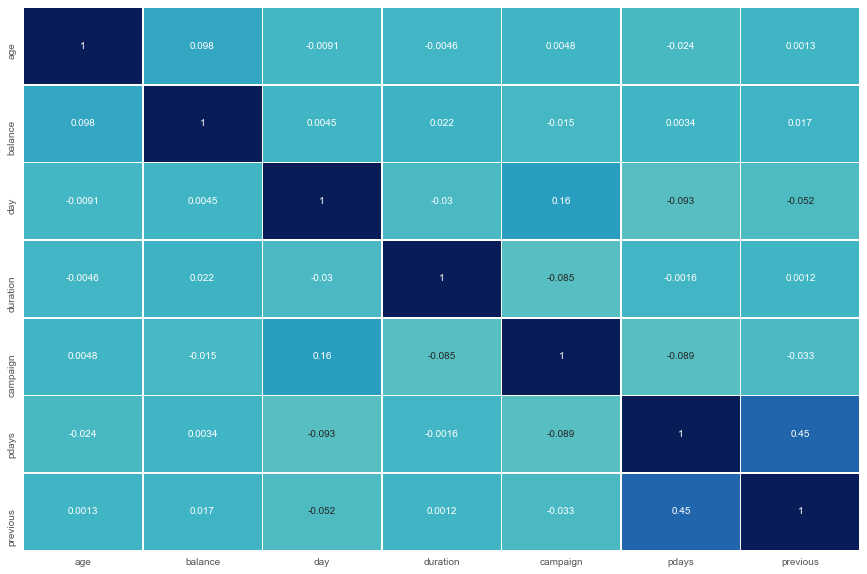

In [7]:
plt.figure(figsize=(15,10))

sns.heatmap(df2.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

plt.show()

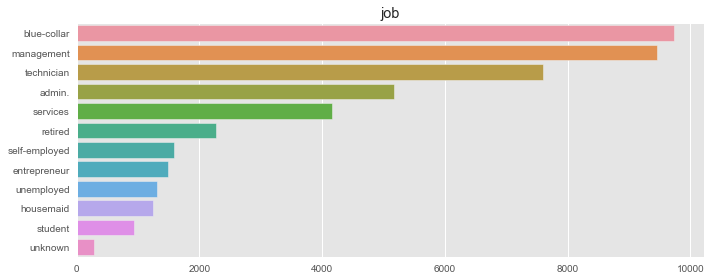

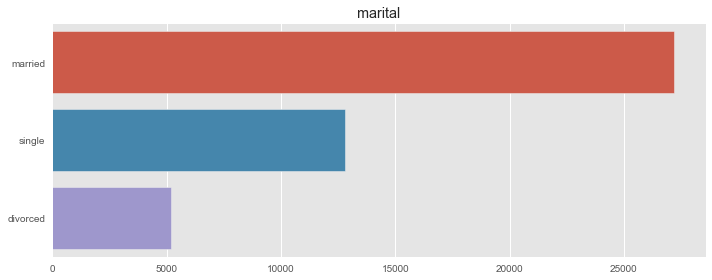

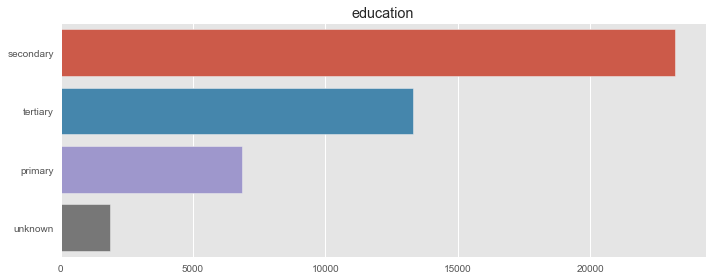

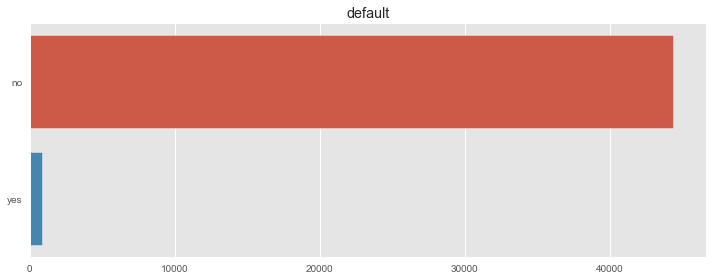

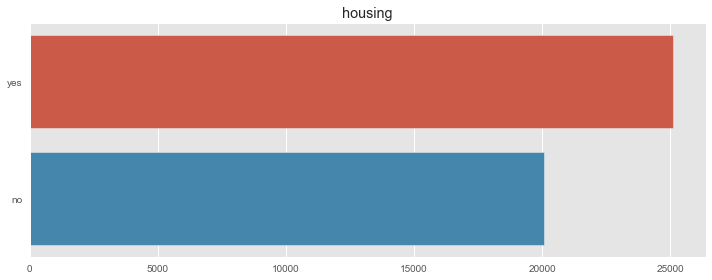

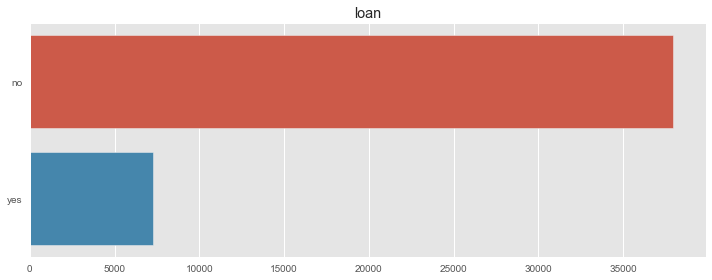

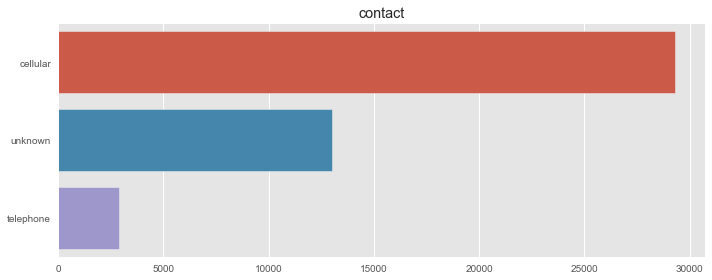

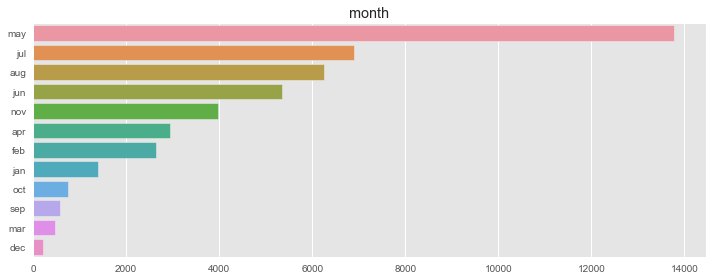

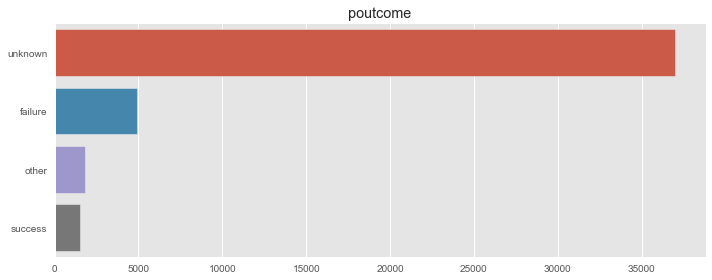

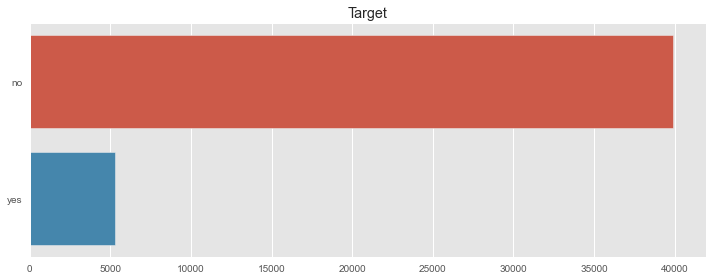

In [8]:
for col in list(df2.select_dtypes(include=['object']).columns):
    plt.figure(figsize=(10,4))
    sns.barplot(df2[col].value_counts().values, df2[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

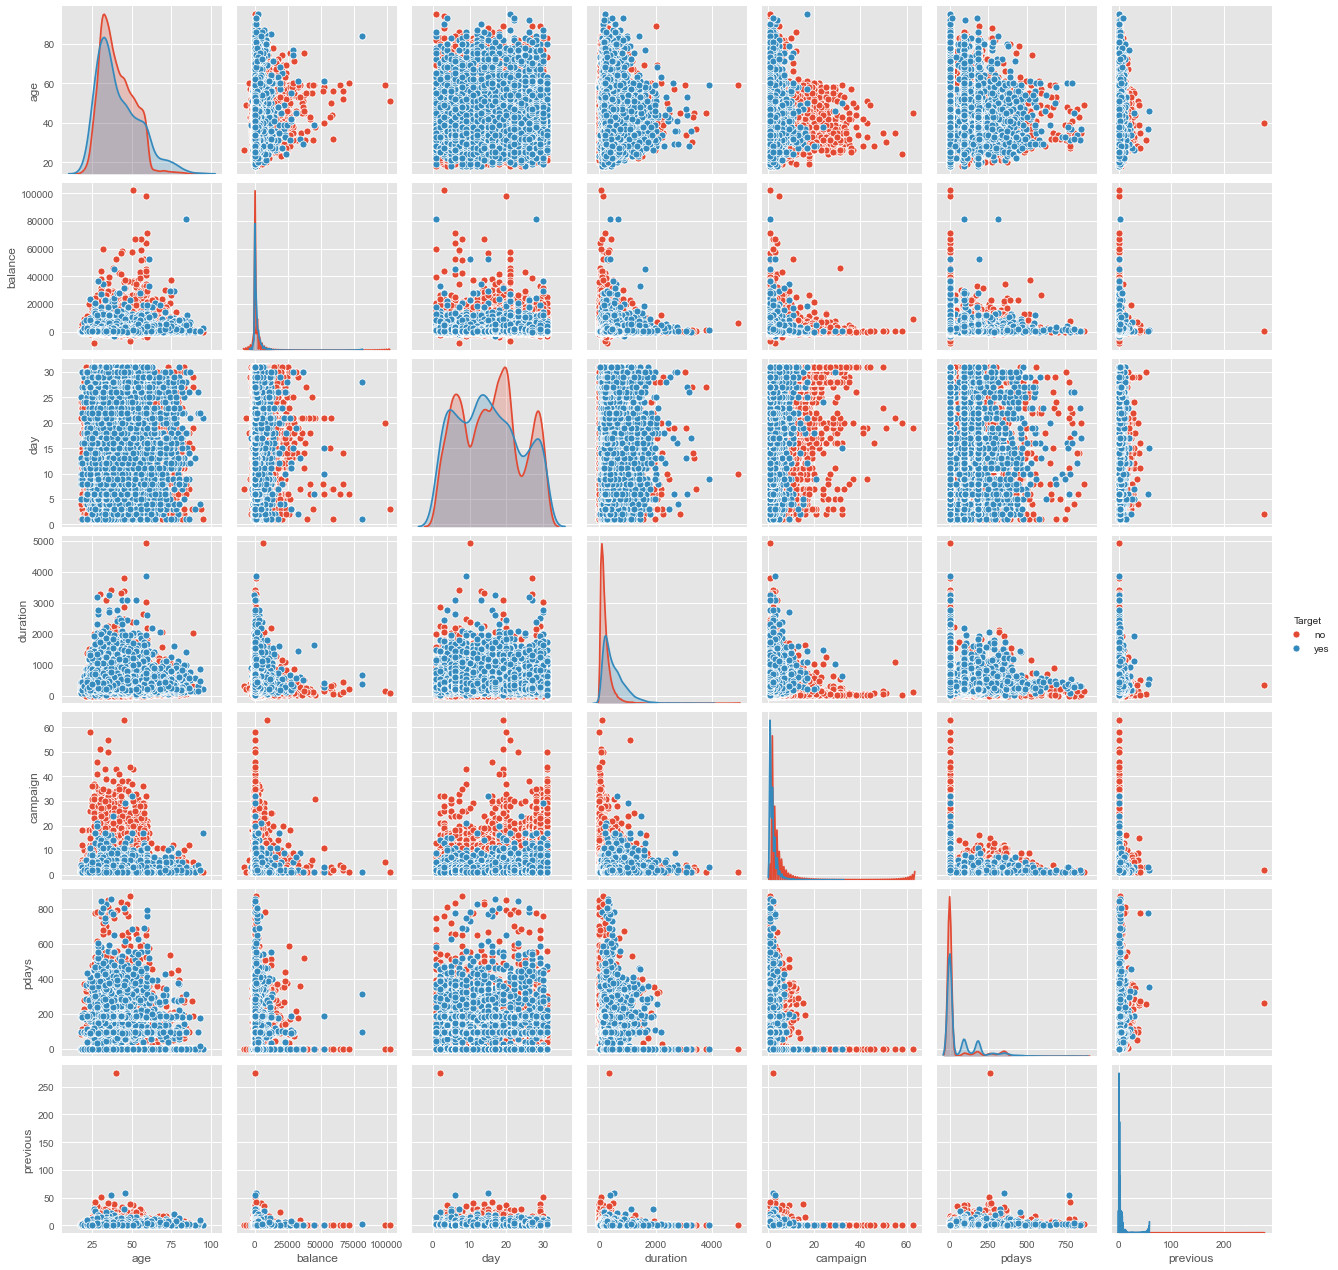

In [9]:
sns.pairplot(df2, hue = 'Target')

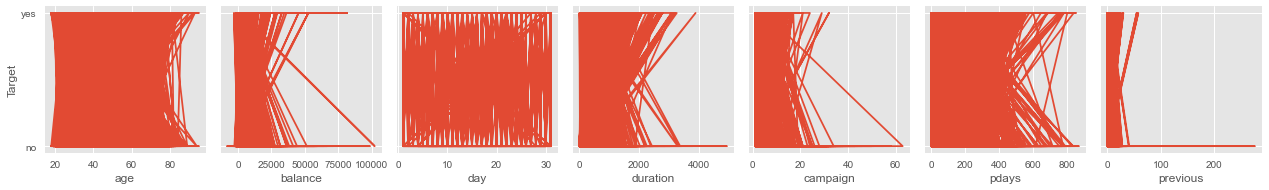

In [10]:
g = sns.PairGrid(df2,y_vars='Target',x_vars=df2.select_dtypes(include=['int64']).columns)
g = g.map(plt.plot)

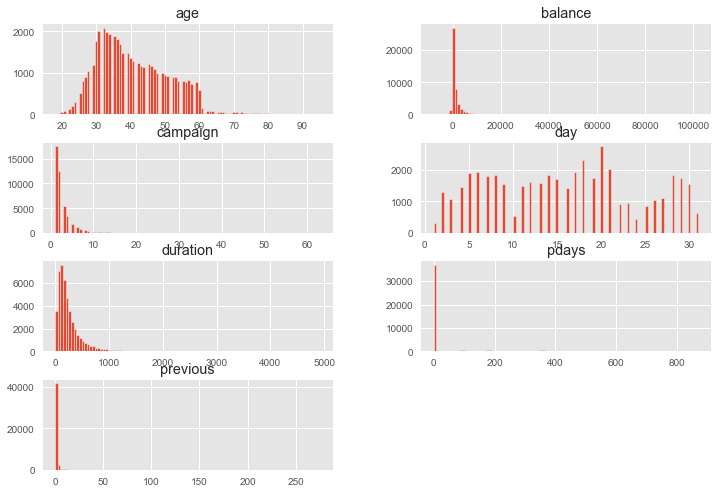

In [11]:
df2.hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 

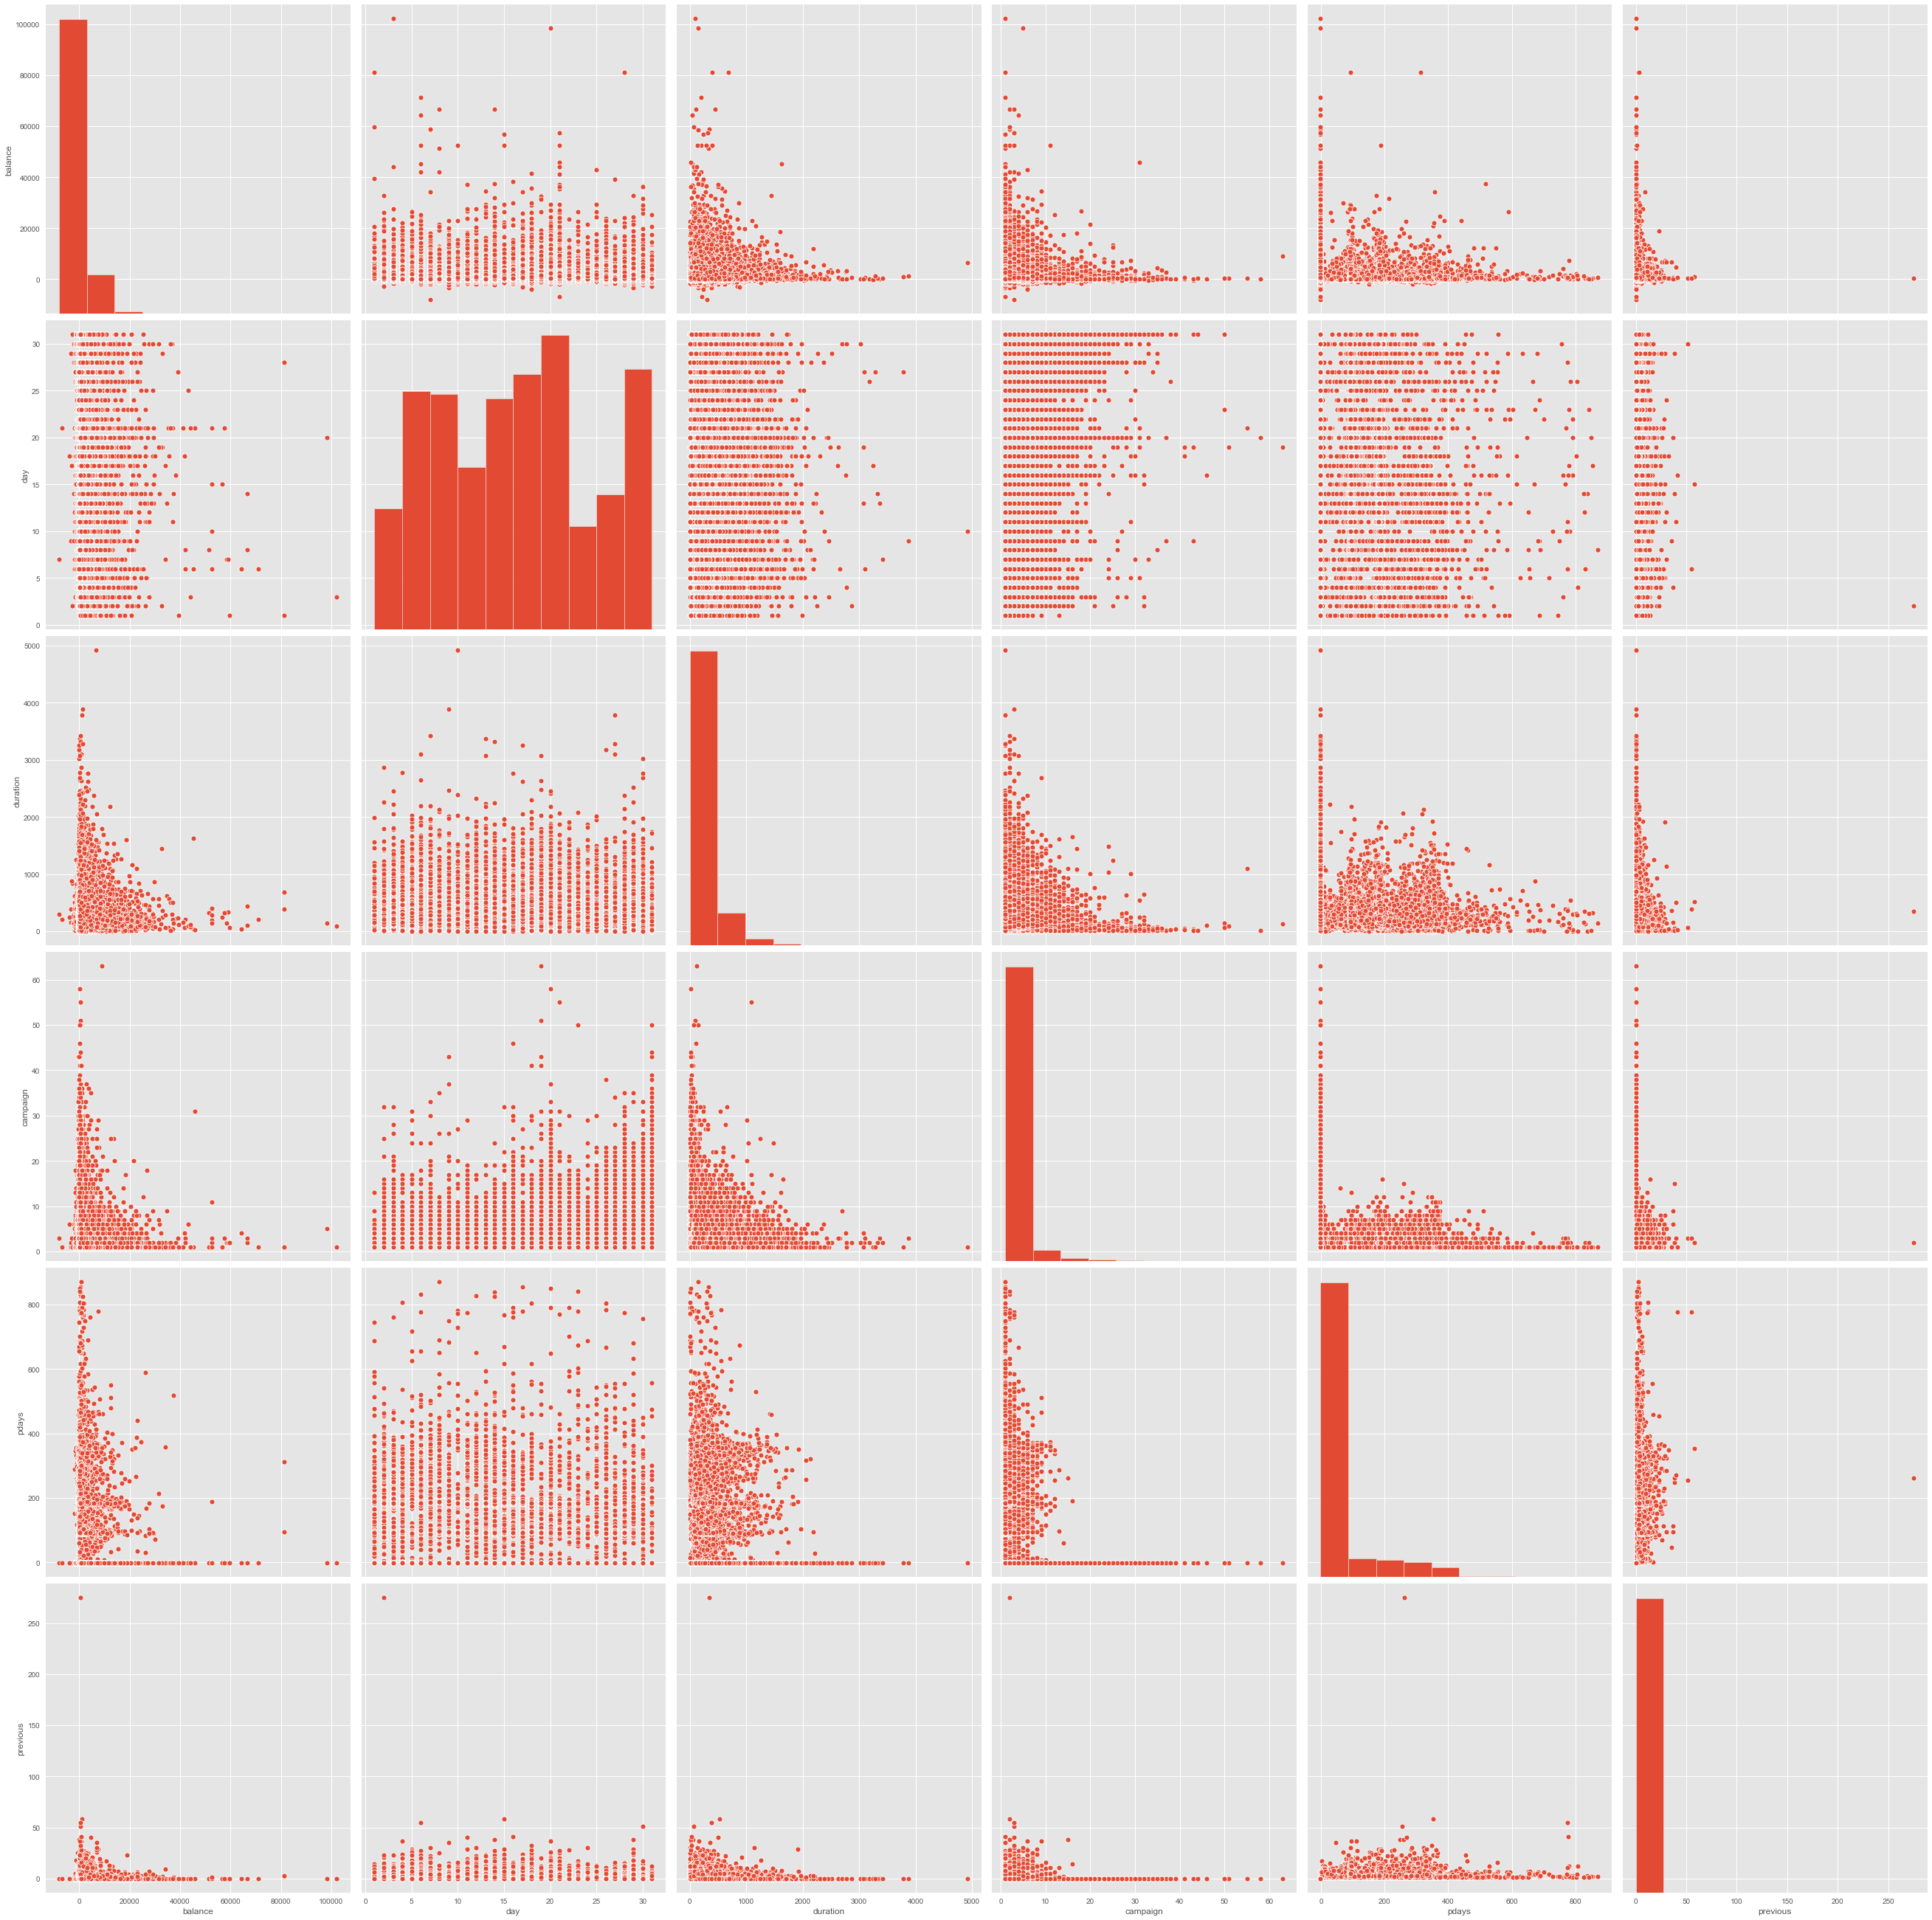

In [12]:
sns.pairplot(df2.iloc[:,1:], height=6)

In [13]:
df2['Target'] = df2['Target'].map({'yes': 1, 'no': 0})

In [14]:
df2.loc[(df2.pdays == -1),'pdays'] = 0
df2.loc[(df2.pdays > 0 ),'pdays'] = 1
df2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,"45,211.00",40.94,10.62,18.00,33.00,39.00,48.00,95.00
balance,"45,211.00","1,362.27","3,044.77","-8,019.00",72.00,448.00,"1,428.00","102,127.00"
day,"45,211.00",15.81,8.32,1.00,8.00,16.00,21.00,31.00
duration,"45,211.00",258.16,257.53,0.00,103.00,180.00,319.00,"4,918.00"
campaign,"45,211.00",2.76,3.10,1.00,1.00,2.00,3.00,63.00
pdays,"45,211.00",0.18,0.39,0.00,0.00,0.00,0.00,1.00
previous,"45,211.00",0.58,2.30,0.00,0.00,0.00,0.00,275.00
Target,"45,211.00",0.12,0.32,0.00,0.00,0.00,0.00,1.00


In [15]:
from sklearn.preprocessing import OneHotEncoder

In [16]:
list(df2.select_dtypes(include=['object']).columns)

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [17]:
newDataSet = pd.get_dummies(data=df2, columns=['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome','pdays'])


In [18]:
newDataSet.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'previous', 'Target',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'pdays_0', 'pdays_1'],
      dtype='object')

In [19]:
del newDataSet['duration']
del newDataSet['previous']

#outcome unknown and other does not make too much sense. Will drop this
del newDataSet['poutcome_unknown']
del newDataSet['poutcome_other']
#education unknown also does not make too much sense. Removing it
del newDataSet['education_unknown']
#lets remove poutcome_success
del newDataSet['poutcome_success']


In [20]:
newDataSet.head()

,age,balance,day,campaign,Target,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,pdays_0,pdays_1
0,58,2143,5,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1,44,29,5,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,33,2,5,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,47,1506,5,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,33,1,5,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [21]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

features = [col for col in newDataSet.columns if col != 'Target']

X_train, X_test, y_train, y_test = train_test_split(newDataSet[features], newDataSet['Target'], test_size=.6, random_state=30)
X_train.shape, X_test.shape

((18084, 46), (27127, 46))

In [22]:
newDataSet['Target']

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: Target, Length: 45211, dtype: int64

### Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)
#predict on test
y_predict = model.predict(X_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

     0    1    2     3     4     5     6     7     8    9  ...   37   38  \
0 0.01 0.00 0.00 -0.10 -0.06 -0.23 -0.08 -0.31 -0.14 0.35  ... 0.38 0.99   

     39    40   41   42    43    44   45  intercept  
0 -0.40 -0.72 0.96 0.84 -1.39 -0.87 0.49      -0.38  

[1 rows x 47 columns]


In [24]:
model_score = model.score(X_test, y_test)
print(model_score)

0.8878239392487189


<AxesSubplot:>

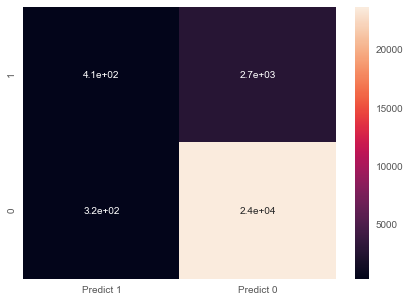

In [25]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [26]:

cnf_matrix_logit = metrics.confusion_matrix(y_test, y_predict)
cnf_matrix_logit

array([[23677,   325],
       [ 2718,   407]])

### Decision Tree Classifier

In [27]:
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns. Other option 
# could be gini index.  
model_entropy = DecisionTreeClassifier(criterion='entropy')

In [28]:
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [29]:
print("Train: %.2f" % model_entropy.score(X_train, y_train))  # performance on train data
print("Test: %.2f" % model_entropy.score(X_test, y_test))  # performance on test data

Train: 1.00
Test: 0.83


In [30]:
clf_pruned = DecisionTreeClassifier(criterion = "entropy", max_depth=4)
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [31]:
print("Train: %.2f" % clf_pruned.score(X_train, y_train))  # performance on train data
print("Test: %.2f" % clf_pruned.score(X_test, y_test))  # performance on test data

Train: 0.88
Test: 0.88


In [32]:
y_train.value_counts()

0    15920
1     2164
Name: Target, dtype: int64

In [33]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

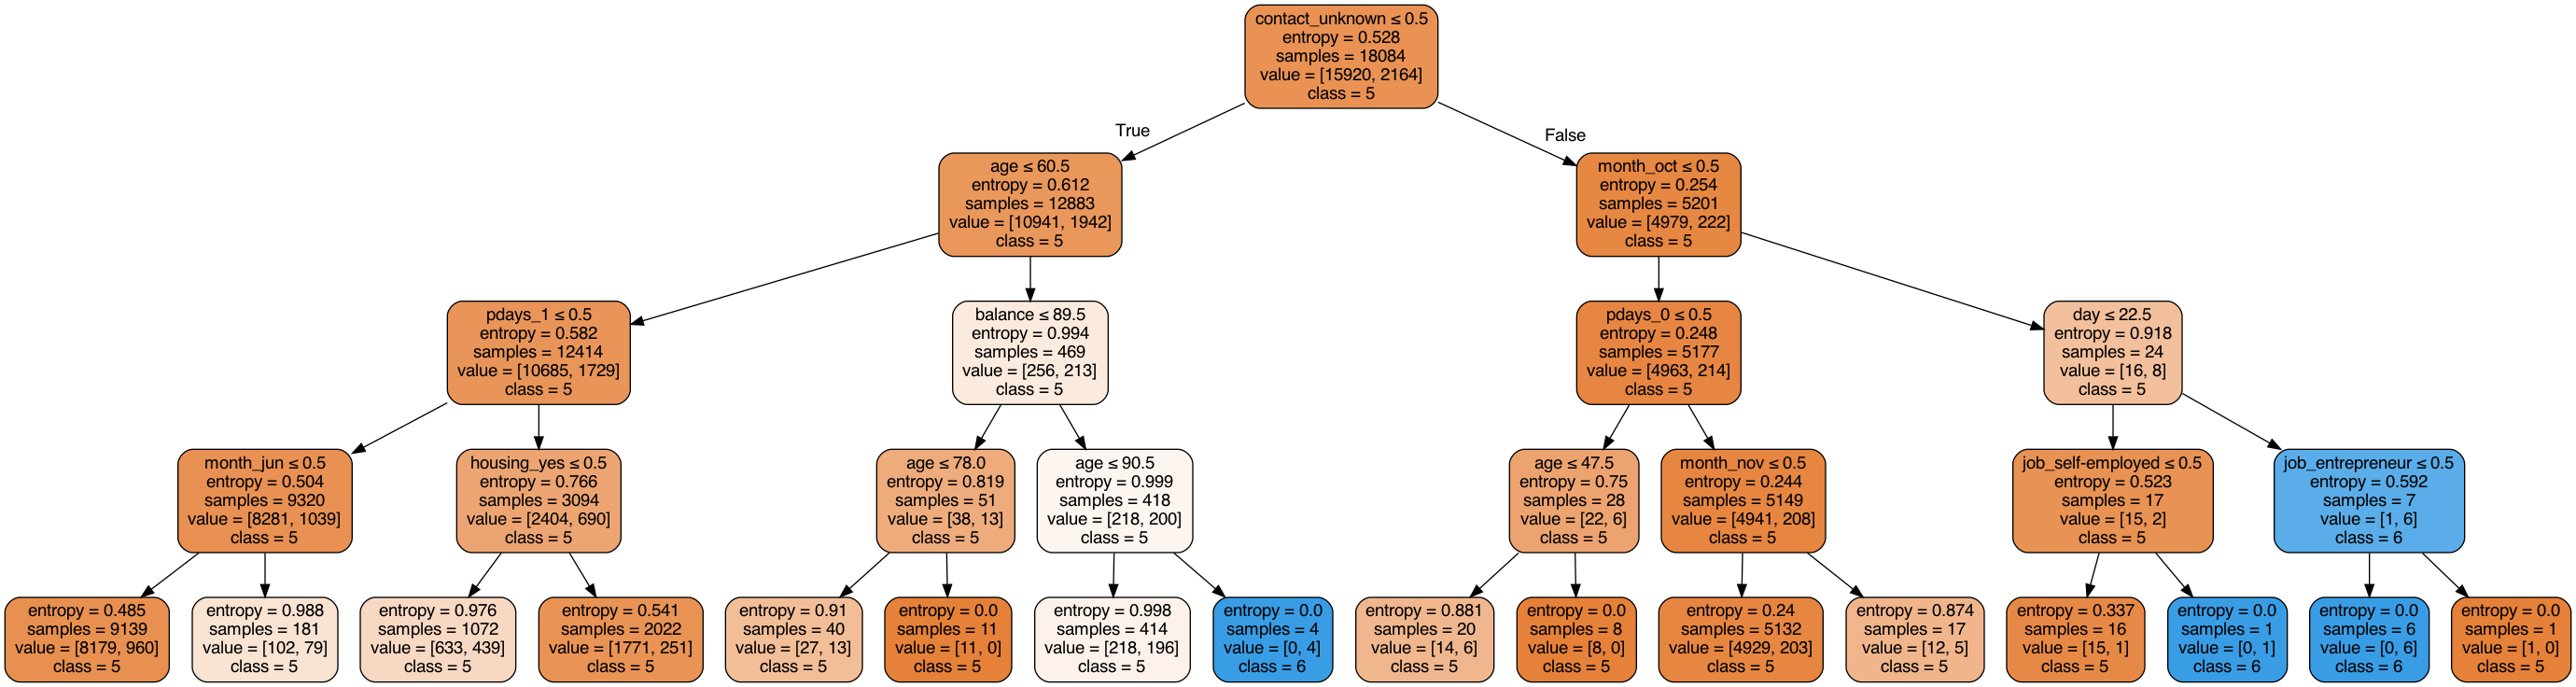

In [34]:
dot_data = StringIO()
export_graphviz(clf_pruned, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['5','6','8'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('wines_pruned.png')
Image(graph.create_png())

In [35]:
preds_train = clf_pruned.predict(X_train)
preds_test = clf_pruned.predict(X_test)

acc_DT = accuracy_score(y_test, preds_test)

## Decision tree performance

In [36]:
# Confusion matrix
pd.crosstab(y_test, preds_test, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,23999,3
1,3121,4


In [37]:
y_train

39110    0
27400    0
30151    0
8745     1
5724     0
        ..
919      0
33268    0
44845    1
4517     0
38693    0
Name: Target, Length: 18084, dtype: int64

/Users/oa/workStation/venv/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
/Users/oa/workStation/venv/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


ClassificationReport(ax=<AxesSubplot:>,
                     cmap=<matplotlib.colors.ListedColormap object at 0x121423340>,
                     model=None)

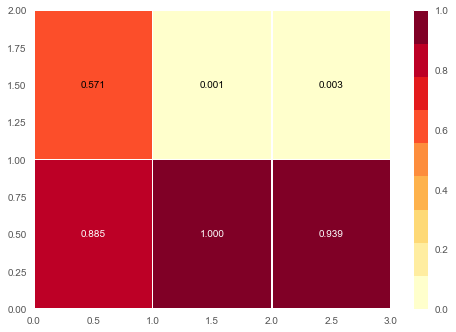

In [38]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(DecisionTreeClassifier(criterion = "entropy", max_depth=4))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz

In [39]:
y_test

34938    0
21569    0
6341     0
21830    0
26585    0
        ..
331      0
545      0
4513     0
41409    0
8036     0
Name: Target, Length: 27127, dtype: int64

/Users/oa/workStation/venv/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


ROCAUC(ax=<AxesSubplot:>, binary=None, model=None)

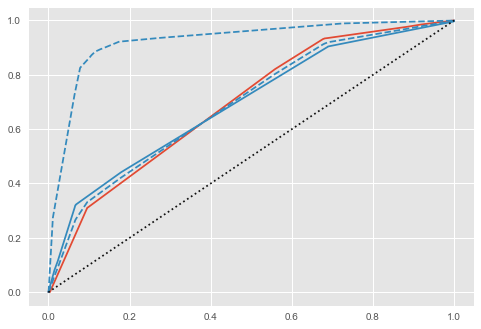

In [40]:
roc = ROCAUC(DecisionTreeClassifier(criterion = "entropy", max_depth=4))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc

#### Performance metrics

- __Precision__: Fraction of actuals per label that were correctly classified by the model
- __Recall__: Fraction of predictions that were correctly classified by the model
- __F1-score__: Weighted harmonic mean of the precision and recall. F1-score: 2 * (precision * recall) / (precision + recall)
- __Support__: Number of occurrences of each class in y_test
- __Accuracy__: Fraction of all observations that were correctly classified by the model
- __Macro avg__: Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account
- __Micro/weighted avg__: Calculate metrics globally by counting the total true positives, false negatives and false positives
- __AUC Score__: Given a random observation from the dataset that belongs to a class, and a random observation that doesn't belong to a class, the AUC is the perecentage of time that our model will classify which is which correctly

### When the tree is regularised, overfitting is reduced, but there is no increase in accuracy

In [41]:
## Calculating feature importance

feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)
feat_imp_dict = dict(zip(features, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
contact_unknown,0.32
housing_yes,0.21
age,0.18
pdays_1,0.15
month_jun,0.08
month_oct,0.01
month_nov,0.01
day,0.01
pdays_0,0.01
balance,0.01


#### From the feature importance dataframe we can infer that 
duration,poutcome_success,contact_unknown,month_oct,contact_cellular

In [42]:
resultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT})
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.88


### Apply the Random forest model and print the accuracy of Random forest Model


In [43]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 100)
rfcl = rfcl.fit(X_train, y_train)
pred_RF = rfcl.predict(X_test)
acc_RF = accuracy_score(y_test, pred_RF)
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [acc_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.88
0,Random Forest,0.89


/Users/oa/workStation/venv/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
/Users/oa/workStation/venv/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


ClassificationReport(ax=<AxesSubplot:>,
                     cmap=<matplotlib.colors.ListedColormap object at 0x1215115b0>,
                     model=None)

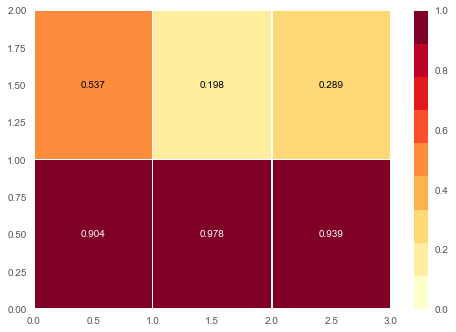

In [44]:
# Visualize model performance with yellowbrick library

viz = ClassificationReport(RandomForestClassifier(n_estimators = 100))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz

/Users/oa/workStation/venv/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


ROCAUC(ax=<AxesSubplot:>, binary=None, model=None)

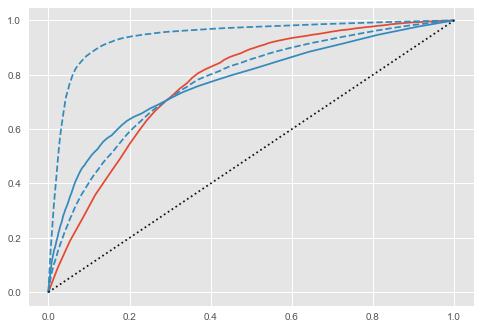

In [45]:
roc = ROCAUC(RandomForestClassifier(n_estimators = 100))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc

#### Compared to the decision tree, we can see that the accuracy has ALMOST NO improved for the Random forest model

## Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.


In [46]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators = 100, learning_rate=0.1, random_state=22)
abcl = abcl.fit(X_train, y_train)
pred_AB =abcl.predict(X_test)
acc_AB = accuracy_score(y_test, pred_AB)
tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'accuracy': [acc_AB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.88
0,Random Forest,0.89
0,Adaboost,0.88


In [47]:
abcl = AdaBoostClassifier(n_estimators = 100, learning_rate=0.5, random_state=22)
abcl = abcl.fit(X_train, y_train)
pred_AB =abcl.predict(X_test)
acc_AB = accuracy_score(y_test, pred_AB)
tempResultsDf = pd.DataFrame({'Method':['Adaboost 0.5'], 'accuracy': [acc_AB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.88
0,Random Forest,0.89
0,Adaboost,0.88
0,Adaboost 0.5,0.89


In [48]:
abcl = AdaBoostClassifier(n_estimators = 100, learning_rate=0.8, random_state=22)
abcl = abcl.fit(X_train, y_train)
pred_AB =abcl.predict(X_test)
acc_AB = accuracy_score(y_test, pred_AB)
tempResultsDf = pd.DataFrame({'Method':['Adaboost 0.8'], 'accuracy': [acc_AB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.88
0,Random Forest,0.89
0,Adaboost,0.88
0,Adaboost 0.5,0.89
0,Adaboost 0.8,0.89


### Apply Bagging Classifier Algorithm and print the accuracy.

In [49]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(X_train, y_train)

In [50]:
pred_BG = bgcl.predict(X_test)
acc_BG = accuracy_score(y_test, pred_BG)

In [51]:
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [acc_BG]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.88
0,Random Forest,0.89
0,Adaboost,0.88
0,Adaboost 0.5,0.89
0,Adaboost 0.8,0.89
0,Bagging,0.89


/Users/oa/workStation/venv/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
/Users/oa/workStation/venv/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


ClassificationReport(ax=<AxesSubplot:>,
                     cmap=<matplotlib.colors.ListedColormap object at 0x1212c73a0>,
                     model=None)

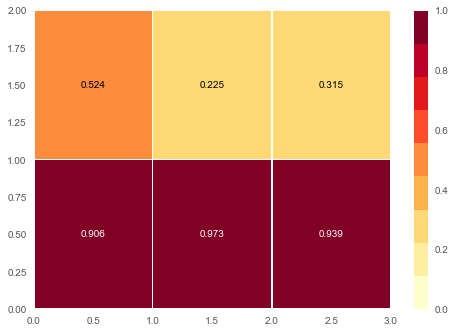

In [52]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz

/Users/oa/workStation/venv/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


ROCAUC(ax=<AxesSubplot:>, binary=None, model=None)

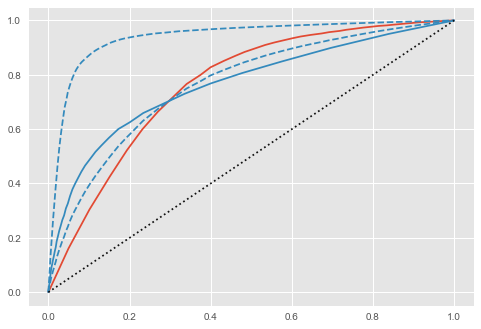

In [53]:
roc = ROCAUC(BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc

### Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [54]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22)
gbcl = gbcl.fit(X_train, y_train)

In [55]:
pred_GB = gbcl.predict(X_test)
acc_GB = accuracy_score(y_test, pred_GB)

In [56]:
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost'], 'accuracy': [acc_GB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.88
0,Random Forest,0.89
0,Adaboost,0.88
0,Adaboost 0.5,0.89
0,Adaboost 0.8,0.89
0,Bagging,0.89
0,Gradient Boost,0.89


/Users/oa/workStation/venv/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
/Users/oa/workStation/venv/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


ClassificationReport(ax=<AxesSubplot:>,
                     cmap=<matplotlib.colors.ListedColormap object at 0x1218dae80>,
                     model=None)

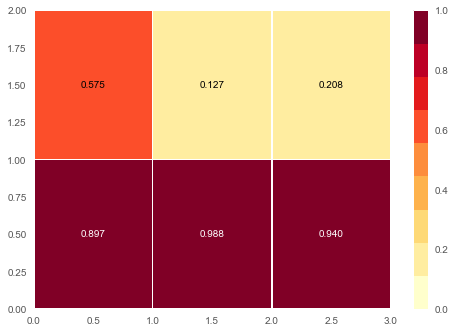

In [57]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz

/Users/oa/workStation/venv/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


ROCAUC(ax=<AxesSubplot:>, binary=None, model=None)

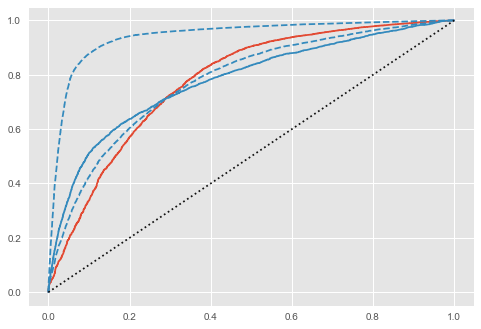

In [58]:
roc = ROCAUC(GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc

In [59]:
# Creating a function for visualizing classifier results
def ClassifierResults(model_w_parameters):
    viz = ClassificationReport(model_w_parameters)
    viz.fit(X_train, y_train)
    viz.score(X_test, y_test)
    viz

def ROCAUCscore(model_w_parameters):
    roc = ROCAUC(model_w_parameters)
    roc.fit(X_train, y_train)
    roc.score(X_test, y_test)
    roc

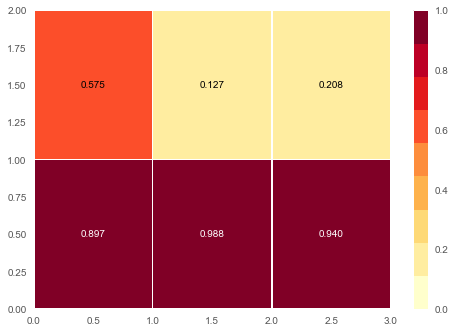

In [60]:
ClassifierResults(GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22))

/Users/oa/workStation/venv/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


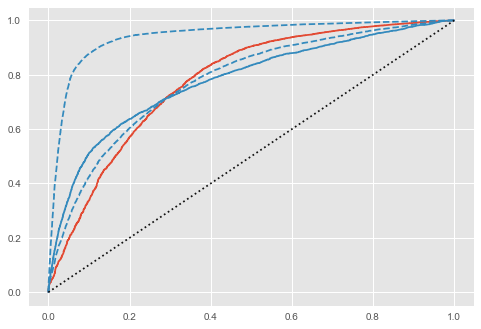

In [61]:
ROCAUCscore(GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22))

/Users/oa/workStation/venv/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


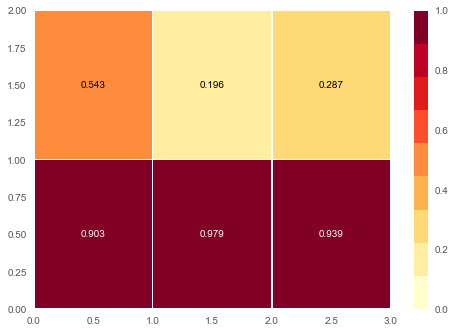

In [62]:
ClassifierResults(RandomForestClassifier(n_estimators = 50))

/Users/oa/workStation/venv/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


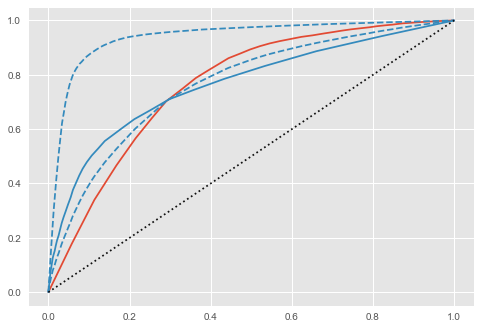

In [63]:
ROCAUCscore(RandomForestClassifier(n_estimators = 50))

In [64]:


model_score = gbcl.score(X_test, y_test)
print(gbcl)
print("Accuracy:",metrics.accuracy_score(y_test, pred_GB))
print("Precision:",metrics.precision_score(y_test, pred_GB))
print("Recall:",metrics.recall_score(y_test, pred_GB))
print("Trainig accuracy",gbcl.score(X_train,y_train))  
print("Testing accuracy",gbcl.score(X_test, y_test))
print("F1 Score:",f1_score(y_test,pred_GB))
print("Roc Auc Score:",roc_auc_score(y_test,pred_GB))

GradientBoostingClassifier(n_estimators=50, random_state=22)
Accuracy: 0.8885980757179194
Precision: 0.5747460087082729
Recall: 0.12672
Trainig accuracy 0.8911745189117452
Testing accuracy 0.8885980757179194
F1 Score: 0.2076560041950708
Roc Auc Score: 0.5572563419715024


In [65]:
model_score = abcl.fit(X_train, y_train)
print(abcl)
print("Accuracy:",metrics.accuracy_score(y_test, pred_AB))
print("Precision:",metrics.precision_score(y_test, pred_AB))
print("Recall:",metrics.recall_score(y_test, pred_AB))
print("Trainig accuracy",gbcl.score(X_train,y_train))  
print("Testing accuracy",gbcl.score(X_test, y_test))
print("F1 Score:",f1_score(y_test,pred_AB))
print("Roc Auc Score:",roc_auc_score(y_test,pred_AB))

AdaBoostClassifier(learning_rate=0.8, n_estimators=100, random_state=22)
Accuracy: 0.8879345301728905
Precision: 0.5534591194968553
Recall: 0.1408
Trainig accuracy 0.8911745189117452
Testing accuracy 0.8885980757179194
F1 Score: 0.22448979591836735
Roc Auc Score: 0.5630047829347555


In [66]:
model_score = rfcl.fit(X_train, y_train)
print(rfcl)
print("Accuracy:",metrics.accuracy_score(y_test, pred_RF))
print("Precision:",metrics.precision_score(y_test, pred_RF))
print("Recall:",metrics.recall_score(y_test, pred_RF))
print("Trainig accuracy",gbcl.score(X_train,y_train))  
print("Testing accuracy",gbcl.score(X_test, y_test))
print("F1 Score:",f1_score(y_test,pred_RF))
print("Roc Auc Score:",roc_auc_score(y_test,pred_RF))

RandomForestClassifier()
Accuracy: 0.8886718030007004
Precision: 0.5467497773820125
Recall: 0.19648
Trainig accuracy 0.8911745189117452
Testing accuracy 0.8885980757179194
F1 Score: 0.2890772128060264
Roc Auc Score: 0.587636716940255


In [67]:
bgcl = bgcl.fit(X_train, y_train)
print(bgcl)
print("Accuracy:",metrics.accuracy_score(y_test, pred_BG))
print("Precision:",metrics.precision_score(y_test, pred_BG))
print("Recall:",metrics.recall_score(y_test, pred_BG))
print("Trainig accuracy",gbcl.score(X_train,y_train))  
print("Testing accuracy",gbcl.score(X_test, y_test))
print("F1 Score:",f1_score(y_test,pred_RF))
print("Roc Auc Score:",roc_auc_score(y_test,pred_BG))

BaggingClassifier(max_samples=0.7, n_estimators=50, oob_score=True,
                  random_state=22)
Accuracy: 0.8871972573450806
Precision: 0.5242718446601942
Recall: 0.22464
Trainig accuracy 0.8911745189117452
Testing accuracy 0.8885980757179194
F1 Score: 0.2890772128060264
Roc Auc Score: 0.5990502724772936


In [68]:
model_score = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)
#predict on test
y_predict = model.predict(X_test)
print(rfcl)
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))
print("Precision:",metrics.precision_score(y_test, y_predict))
print("Recall:",metrics.recall_score(y_test, y_predict))
print("Trainig accuracy",gbcl.score(X_train,y_train))  
print("Testing accuracy",gbcl.score(X_test, y_test))
print("F1 Score:",f1_score(y_test,y_predict))
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

RandomForestClassifier()
Accuracy: 0.8878239392487189
Precision: 0.5560109289617486
Recall: 0.13024
Trainig accuracy 0.8911745189117452
Testing accuracy 0.8885980757179194
F1 Score: 0.21104485351309307
Roc Auc Score: 0.558349730855762


### as a final understanding of the models, looks like all the models are doing about the same. I am not seeing any major improvement in the models